In [1]:
# import packages and data

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload

#import dask.dataframe as dd
import pandas as pd # dataframe and analytics
import numpy as np # math 
import matplotlib.pyplot as plt # ploting
import seaborn as sns # bases on matplotlib for ploting

import os
import pymongo as pymongo
from pymongo import MongoClient
import pprint
import json

In [2]:
path = 'D:/customer churn/'
train = pd.read_csv(path + 'Train_data.csv',header='infer')
test = pd.read_csv(path +'Test_data.csv',header='infer')

In [4]:
#d = pd.read_csv(path + 'Train_data.csv',header='infer')

In [5]:
# creating an channel
channel  = MongoClient(port = 27017)
Select_db = channel.data
# Set collection name
#Select_collection = Select_db.data

In [209]:
#Convert dataframe into json format
#NewData_json = json.loads(train.T.to_json()).values()
# Insert new json into mongo
#Select_db.customer_churn.insert(NewData_json)



In [15]:
Collection_Names = Select_db.collection_names(include_system_collections = False)
Collection_Names

['data', 'test', 'customer_churn']

In [13]:
Select_collection = Select_db.customer_churn
# Extract first document
pprint.pprint(Select_collection.find_one())

{'Churn': ' False.',
 '_id': ObjectId('5affe38d61828824443a6703'),
 'account length': 128,
 'area code': 415,
 'international plan': ' no',
 'number customer service calls': 1,
 'number vmail messages': 25,
 'phone number': ' 382-4657',
 'state': 'KS',
 'total day calls': 110,
 'total day charge': 45.07,
 'total day minutes': 265.1,
 'total eve calls': 99,
 'total eve charge': 16.78,
 'total eve minutes': 197.4,
 'total intl calls': 3,
 'total intl charge': 2.7,
 'total intl minutes': 10.0,
 'total night calls': 91,
 'total night charge': 11.01,
 'total night minutes': 244.7,
 'voice mail plan': ' yes'}


In [ ]:
# A look at the data

In [53]:
test.shape

(1667, 23)

In [38]:
train.head(3)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.


In [3]:
train['ch'] = 1

In [4]:
test['ch'] = 0

In [5]:
d = pd.concat([train,test],axis=0)

In [6]:
d.shape

(5000, 22)

In [39]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                            3333 non-null object
account length                   3333 non-null int64
area code                        3333 non-null int64
phone number                     3333 non-null object
international plan               3333 non-null object
voice mail plan                  3333 non-null object
number vmail messages            3333 non-null int64
total day minutes                3333 non-null float64
total day calls                  3333 non-null int64
total day charge                 3333 non-null float64
total eve minutes                3333 non-null float64
total eve calls                  3333 non-null int64
total eve charge                 3333 non-null float64
total night minutes              3333 non-null float64
total night calls                3333 non-null int64
total night charge               3333 non-null float64
total intl minutes           

In [50]:
# Looking to missing values

In [51]:
train.isnull().sum()

state                            0
account length                   0
area code                        0
phone number                     0
international plan               0
voice mail plan                  0
number vmail messages            0
total day minutes                0
total day calls                  0
total day charge                 0
total eve minutes                0
total eve calls                  0
total eve charge                 0
total night minutes              0
total night calls                0
total night charge               0
total intl minutes               0
total intl calls                 0
total intl charge                0
number customer service calls    0
Churn                            0
ch                               0
dtype: int64

In [52]:
# there are no missing values

In [53]:
# statistical analysis

In [54]:
train.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,ch
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.0
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,1.0
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.0
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,1.0
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,1.0
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,1.0
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,1.0
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.0


In [55]:
test.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,number customer service calls,ch
count,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.000000,1667.0
mean,98.646671,436.369526,7.067786,181.316197,99.217157,30.824337,199.949190,100.344331,16.995903,199.431074,99.542292,8.974559,10.310738,4.346731,2.784421,1.585483,0.0
std,39.400755,41.890588,13.235274,52.732174,19.327148,8.964421,50.232869,19.637935,4.269758,50.437010,20.717441,2.269604,2.699660,2.446252,0.728764,1.288179,0.0
min,1.000000,408.000000,0.000000,6.600000,34.000000,1.120000,22.300000,38.000000,1.900000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,72.000000,408.000000,0.000000,143.750000,86.000000,24.440000,165.900000,88.000000,14.100000,166.600000,86.000000,7.500000,8.600000,3.000000,2.320000,1.000000,0.0
50%,98.000000,415.000000,0.000000,181.000000,99.000000,30.770000,200.400000,100.000000,17.030000,199.400000,99.000000,8.970000,10.400000,4.000000,2.810000,1.000000,0.0
75%,126.000000,415.000000,0.000000,215.750000,112.000000,36.680000,232.300000,113.000000,19.745000,233.050000,113.000000,10.490000,12.000000,5.000000,3.240000,2.000000,0.0
max,238.000000,510.000000,52.000000,351.500000,160.000000,59.760000,359.300000,169.000000,30.540000,381.600000,170.000000,17.170000,19.700000,19.000000,5.320000,7.000000,0.0


In [25]:
# lets see the distibution analysis
# for this i will be using density plots as they give good distirbution of the numerical data

Text(0.5,1,'Distribution of total day minutes')

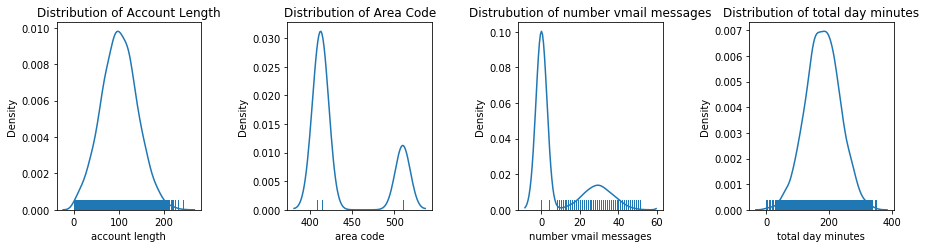

In [49]:

#sns.distplot(train['account length'], hist=False, rug=True)
#kde=False, fit=stats.gamma
plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.subplot(441)
plt.ylabel('Density')
plt.title('Distribution of Account Length')
sns.distplot(train['account length'],  rug=True,hist=False)


plt.subplot(442)
sns.distplot(train['area code'], hist=False, rug=True)
plt.ylabel('Density')
plt.title('Distribution of Area Code')


plt.subplot(443)
sns.distplot(train['number vmail messages'], hist=False, rug=True)
plt.ylabel('Density')
plt.title('Distrubution of number vmail messages')

plt.subplot(444)
sns.distplot(train['total day minutes'], hist=False, rug=True)
plt.ylabel('Density')
plt.title('Distribution of total day minutes') 




Text(0.5,1,'Distribution of total eve calls')

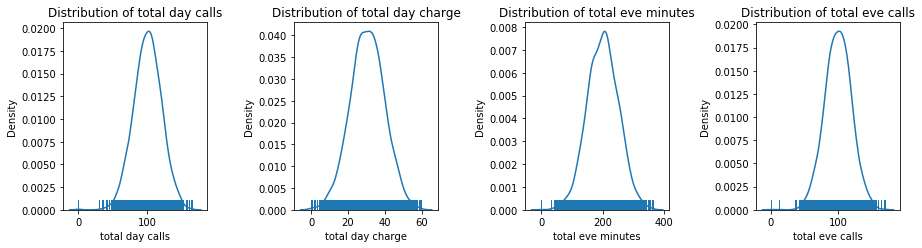

In [50]:
plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.subplot(441)
sns.distplot(train['total day calls'], hist=False, rug=True)
plt.ylabel('Density')
plt.title('Distribution of total day calls') 

plt.subplot(442)
sns.distplot(train['total day charge'], hist=False, rug=True)
plt.ylabel('Density')
plt.title('Distribution of total day charge') 

plt.subplot(443)
sns.distplot(train['total eve minutes'], hist=False, rug=True)
plt.ylabel('Density')
plt.title('Distribution of total eve minutes') 

plt.subplot(444)
sns.distplot(train['total eve calls'], hist=False, rug=True)
plt.ylabel('Density')
plt.title('Distribution of total eve calls') 


Text(0.5,1,'Distribution of total intl calls')

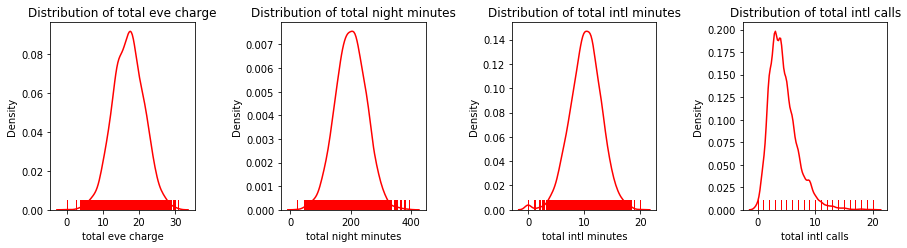

In [51]:
plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.subplot(441)
sns.distplot(train['total eve charge'], hist=False, rug=True,color='red')
plt.ylabel('Density')
plt.title('Distribution of total eve charge') 

plt.subplot(442)
sns.distplot(train['total night minutes'], hist=False, rug=True,color='red')
plt.ylabel('Density')
plt.title('Distribution of total night minutes') 

plt.subplot(443)
sns.distplot(train['total intl minutes'], hist=False, rug=True,color='red')
plt.ylabel('Density')
plt.title('Distribution of total intl minutes') 

plt.subplot(444)
sns.distplot(train['total intl calls'], hist=False, rug=True,color='red')
plt.ylabel('Density')
plt.title('Distribution of total intl calls') 


Text(0.5,1,'Distribution of number customer service calls')

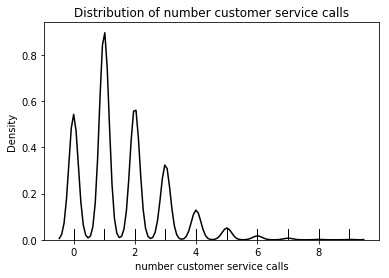

In [55]:
# 
sns.distplot(train['number customer service calls'], hist=False, rug=True,color='black')
plt.ylabel('Density')
plt.title('Distribution of number customer service calls') 

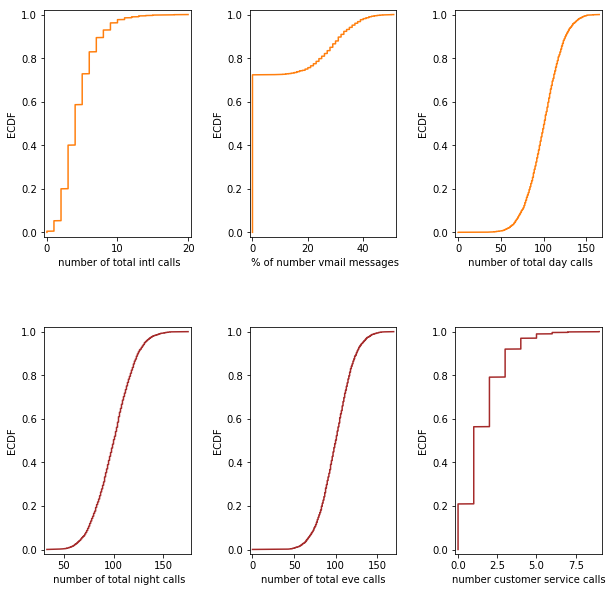

In [275]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(2,3,1)
x = np.sort(train['total intl calls'])
y = np.arange(1,len(x)+1)/len(x)
_ = plt.plot(x,y,color = "#ff7f0e")
_ = plt.xlabel(' number of total intl calls')
_ = plt.ylabel('ECDF')
plt.margins(0.02)

plt.subplot(2,3,2)
x = np.sort(train['number vmail messages'])
y = np.arange(1,len(x)+1)/len(x)
_ = plt.plot(x,y,color= "#ff7f0e")
_ = plt.xlabel(' % of number vmail messages')
_ = plt.ylabel('ECDF')
plt.margins(0.02)

plt.subplot(2,3,3)
x = np.sort(train['total day calls'])
y = np.arange(1,len(x)+1)/len(x)
_ = plt.plot(x,y,color = "#ff7f0e")
_ = plt.xlabel(' number of total day calls')
_ = plt.ylabel('ECDF')
plt.margins(0.02)

plt.subplot(2,3,4)
x = np.sort(train['total night calls'])
y = np.arange(1,len(x)+1)/len(x)
_ = plt.plot(x,y,color='brown')
_ = plt.xlabel(' number of total night calls')
_ = plt.ylabel('ECDF')
plt.margins(0.02)


plt.subplot(2,3,5)
x = np.sort(train['total eve calls'])
y = np.arange(1,len(x)+1)/len(x)
_ = plt.plot(x,y,color='brown')
_ = plt.xlabel('number of total eve calls')
_ = plt.ylabel('ECDF')
plt.margins(0.02)



plt.subplot(2,3,6)
x = np.sort(train['number customer service calls'])
y = np.arange(1,len(x)+1)/len(x)
_ = plt.plot(x,y,color='brown')
_ = plt.xlabel('number customer service calls')
_ = plt.ylabel('ECDF')
plt.margins(0.02)





if we see the Cumulative distribution we see that about 0.8 internattionl calls are below 10 , 
from total day calls 60 % of the people are making 100 calls a day
total night calls 40 % people are making 100 calls a day at night 
total eve calls 20  % people are making 50 calls at evening time 
CDF 60 to 80 % are making < 3 calls to service center

In [51]:
print('unique points phone number:', len(train['phone number'].unique()))
print('unique points international plan: ', len(train['international plan'].unique()))
print('unique points state: ', len(train['state'].unique()))
print('unique points voice mail plan: ', len(train['voice mail plan'].unique()))
print('unique points Account length: ', len(train['account length'].unique()))
print('unique points area code: ', len(train['area code'].unique()))

unique points phone number: 3333
unique points international plan:  2
unique points state:  51
unique points voice mail plan:  2
unique points Account length:  212
unique points area code:  3


In [45]:
train['Churn'].value_counts()

 False.    2850
 True.      483
Name: Churn, dtype: int64

In [ ]:
# target variables is imbalanced 

In [46]:
train['international plan'].value_counts()

 no     3010
 yes     323
Name: international plan, dtype: int64

In [47]:
train['voice mail plan'].value_counts()

 no     2411
 yes     922
Name: voice mail plan, dtype: int64

In [49]:
train['state'].value_counts().head()

WV    106
MN     84
NY     83
AL     80
WI     78
Name: state, dtype: int64

In [ ]:
# visualization of categorical variables


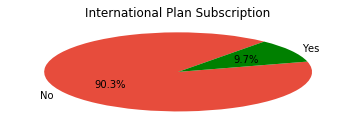

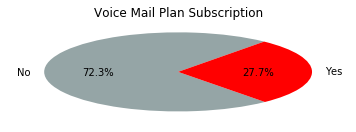

In [148]:
#plt.figure(figsize=(8,8))
plt.subplot(211)
import matplotlib.pyplot as plt
plan_number = [3010,323]
international_plan = ['No', 'Yes']
colors = ["#e74c3c", 'g']
plt.pie(plan_number, labels=international_plan, colors=colors, startangle=50, autopct='%.1f%%')
plt.title('International Plan Subscription')
plt.show()

plt.subplot(212)
import matplotlib.pyplot as plt
plan_number = [2411, 922]
international_plan = ['No', 'Yes']
colors = ['#95a5a6', 'red']
plt.pie(plan_number, labels=international_plan, colors=colors, startangle=50, autopct='%.1f%%')
plt.title('Voice Mail Plan Subscription')
plt.show()

In [58]:
state = d['state']

In [59]:
state = state.value_counts()
#state.reset_index(inplace = True)

In [60]:
state= state.reset_index()

Text(0.5,1,'States Distribution')

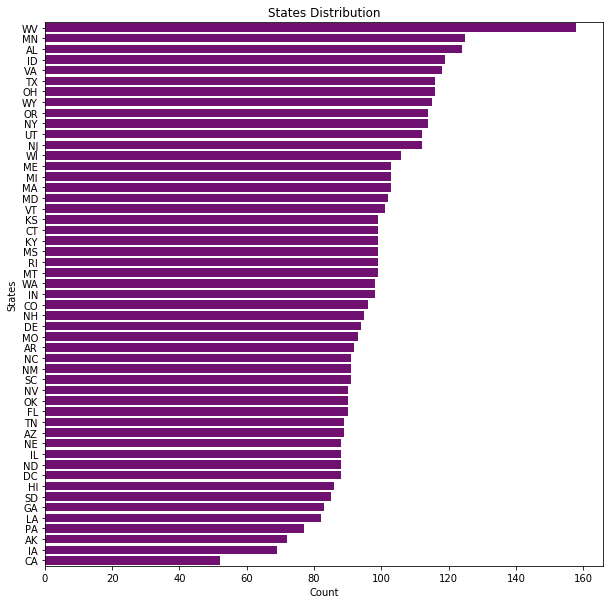

In [62]:
plt.figure(figsize=(10,10))
sns.barplot(x = 'state',y='index',data=state,color='purple')
plt.ylabel('States')
plt.xlabel('Count')
plt.title('States Distribution')

In [77]:
cat_names = ['international plan','state','voice mail plan']

In [79]:
from scipy.stats import chi2_contingency
#loop for chi square values
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(train['Churn'], train[i]))
    print(p)

international plan
2.4931077033159556e-50
state
0.002296221552011188
voice mail plan
5.15063965903898e-09


In [7]:
train = pd.concat([train,test],axis=0)

In [8]:
from sklearn.preprocessing import LabelEncoder
L = LabelEncoder()

In [9]:
names = ['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'number customer service calls','Churn']

In [10]:
for i in train[names]:
    if train[i].dtypes == np.object:
        l = LabelEncoder()
        train[i] = l.fit_transform(train[i])
    else:
        pass
        

In [11]:
train.shape

(5000, 22)

In [12]:
x = ['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'number customer service calls','Churn']

Text(0.5,1,'Correlation between different fearures')

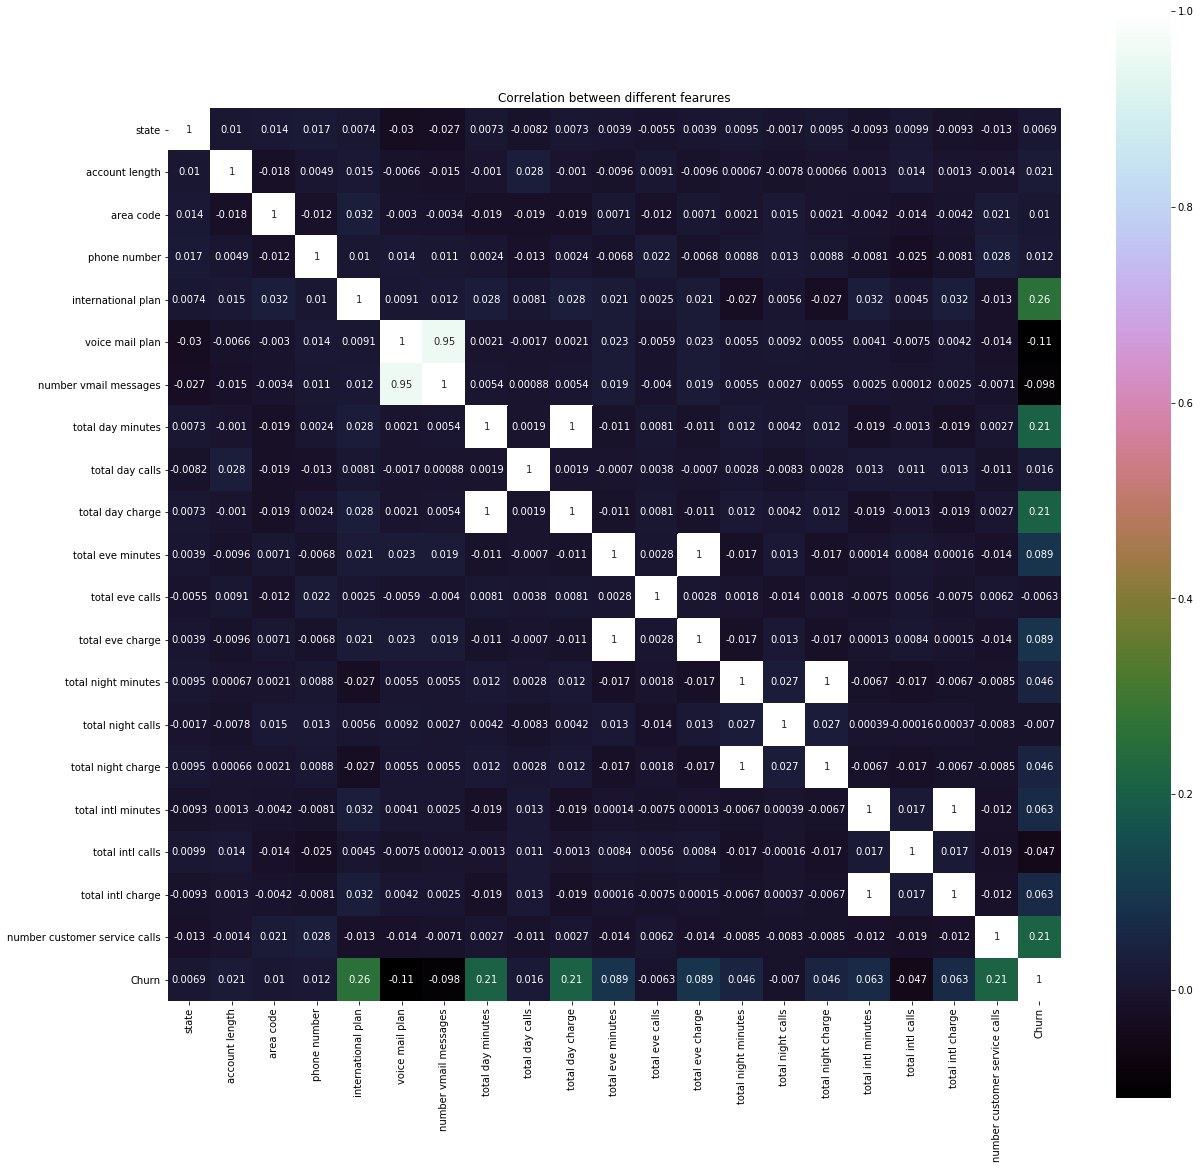

In [13]:
co = train[x].corr()
correlation = co
#plt.figure(figsize=(10,10))
plt.figure(figsize = (20,20))
g = sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix',xticklabels=True,yticklabels=True)
g.set_yticklabels(g.get_yticklabels(), rotation =0)
g.set_xticklabels(g.get_yticklabels(), rotation =90)
plt.title('Correlation between different fearures')

In [25]:
# bivariant analysis

Text(0.5,1,'total eve calls')

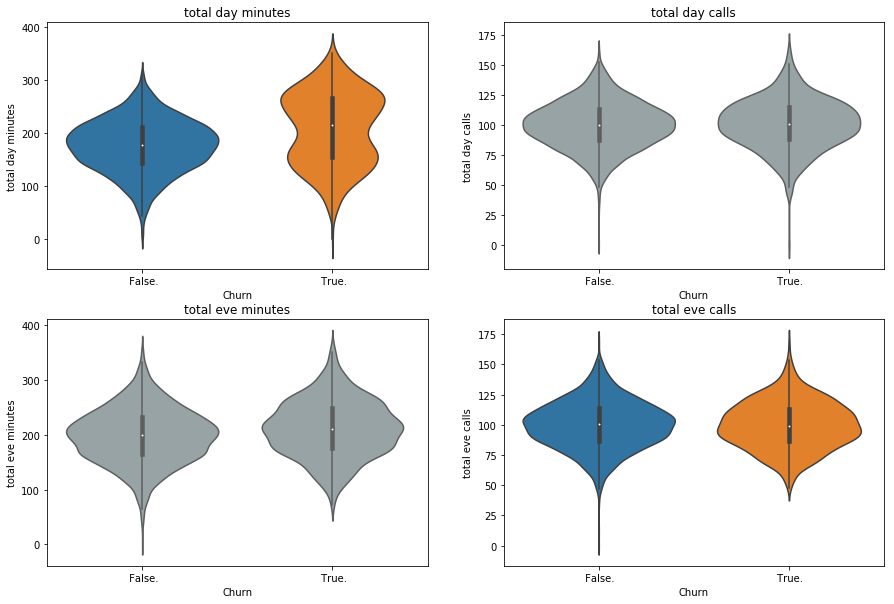

In [26]:
plt.figure(figsize=(15,10))

plt.subplot(221)
plt.title('total day minutes')
sns.violinplot(y=train['total day minutes'],x=d['Churn'])

plt.subplot(222)
sns.violinplot(y=train['total day calls'],x=d['Churn'],color="#95a5a6")
plt.title('total day calls')


plt.subplot(223)
sns.violinplot(y=train['total eve minutes'],x=d['Churn'],color="#95a5a6")
plt.title('total eve minutes')

plt.subplot(224)
sns.violinplot(y=train[ 'total eve calls'],x=d['Churn'])
plt.title('total eve calls')  

from the above we can see that 
total day minutes :- false has a wider distribution then the true and the length is also more that means people are talking
little less and little more then people who dont churn out futher talk time for is less at the range of 150 to 200 and little more above then who dont churn out and box plot is larger for true

total day calls:- box plot is almost same but false has a wider distribution

total eve minutes:- people who churn out are actually talk in the evening 




Text(0.5,1,'total intl minutes')

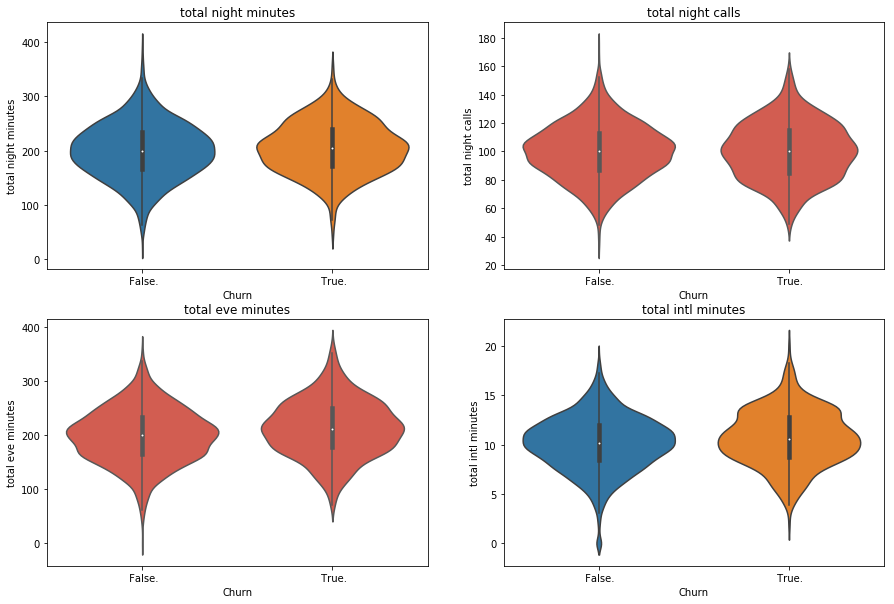

In [183]:
plt.figure(figsize=(15,10))

plt.subplot(221)
plt.title('total night minutes')
sns.violinplot(y=train['total night minutes'],x=d['Churn'])

plt.subplot(222)
sns.violinplot(y=train[ 'total night calls'],x=d['Churn'],color="#e74c3c")
plt.title( 'total night calls')


plt.subplot(223)
sns.violinplot(y=train['total eve minutes'],x=d['Churn'],color="#e74c3c")
plt.title('total eve minutes')

plt.subplot(224)
sns.violinplot(y=train[ 'total intl minutes'],x=d['Churn'])
plt.title('total intl minutes')

In [ ]:
we can claearly see the effect on churn total night minutes , eve minutes

Text(0.5,1,'number customer service calls')

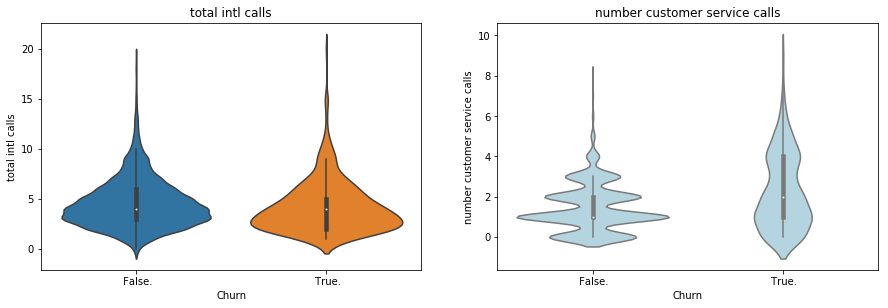

In [185]:
plt.figure(figsize=(15,10))

plt.subplot(221)
plt.title('total intl calls')
sns.violinplot(y=train['total intl calls'],x=d['Churn'])

plt.subplot(222)
sns.violinplot(y=train[ 'number customer service calls'],x=d['Churn'],color='lightblue')
plt.title( 'number customer service calls')



#plt.subplot(224)
#sns.violinplot(y=train[ 'total intl minutes'],x=d['Churn'],color='red')
#plt.title('total intl minutes')

we can clearly see the effect of customer service calls on churn box plot is higher and distribution is constant and variation in  spread, length is also seen for churn

In [ ]:
# feature enegineering 

In [12]:
d['phone number'] =  d['phone number'].astype('str')
x = []
for i in d['phone number']:
    x.append(i.split('-')[0])
    
z = []
for i in x:
    z.append(int(i))
    
    
train['Phone code'] = z

In [13]:
train['total'] = train['total day charge'] + train['total eve charge'] + train['total night charge'] + train['total intl charge']

In [14]:

x_churn_mean = train.groupby('number customer service calls')['Churn'].mean()
x_churn_mean = x_churn_mean.reset_index() 
train = train.merge(x_churn_mean,on='number customer service calls',how='left')

In [15]:
x_mean_phone = train.groupby('Phone code')['Churn_x'].mean()
x_mean_phone = x_mean_phone.reset_index()
x_mean_phone.rename(columns={'Churn_x':'mean_phone'},inplace = True)
train = train.merge(x_mean_phone,on='Phone code',how='left')

In [16]:
#train['account length']

In [17]:
x_mean_phone = train.groupby('account length')['Churn_x'].mean()
x_mean_phone = x_mean_phone.reset_index()
x_mean_phone.rename(columns={'Churn_x':'account_mean'},inplace = True)
train = train.merge(x_mean_phone,on='account length',how='left')

In [18]:
# assumntion is call with less talk may churn
# 



In [19]:
 train['avg'] = train['total day minutes']/train['total day calls']

In [20]:

train['avg/e'] = train['total eve minutes']/train['total eve calls']
train['avg/n'] = train['total night minutes']/train['total night calls']
train['avg/i'] = train['total intl minutes']/train['total intl calls']
    

In [21]:
n = [
       'avg', 
        'avg/e', 'avg/n',
       'avg/i','Churn_y','Churn_x','total','mean_phone','Phone code','account_mean']

In [94]:
co = train[n].corr()

Text(0.5,1,'Correlation between different fearures')

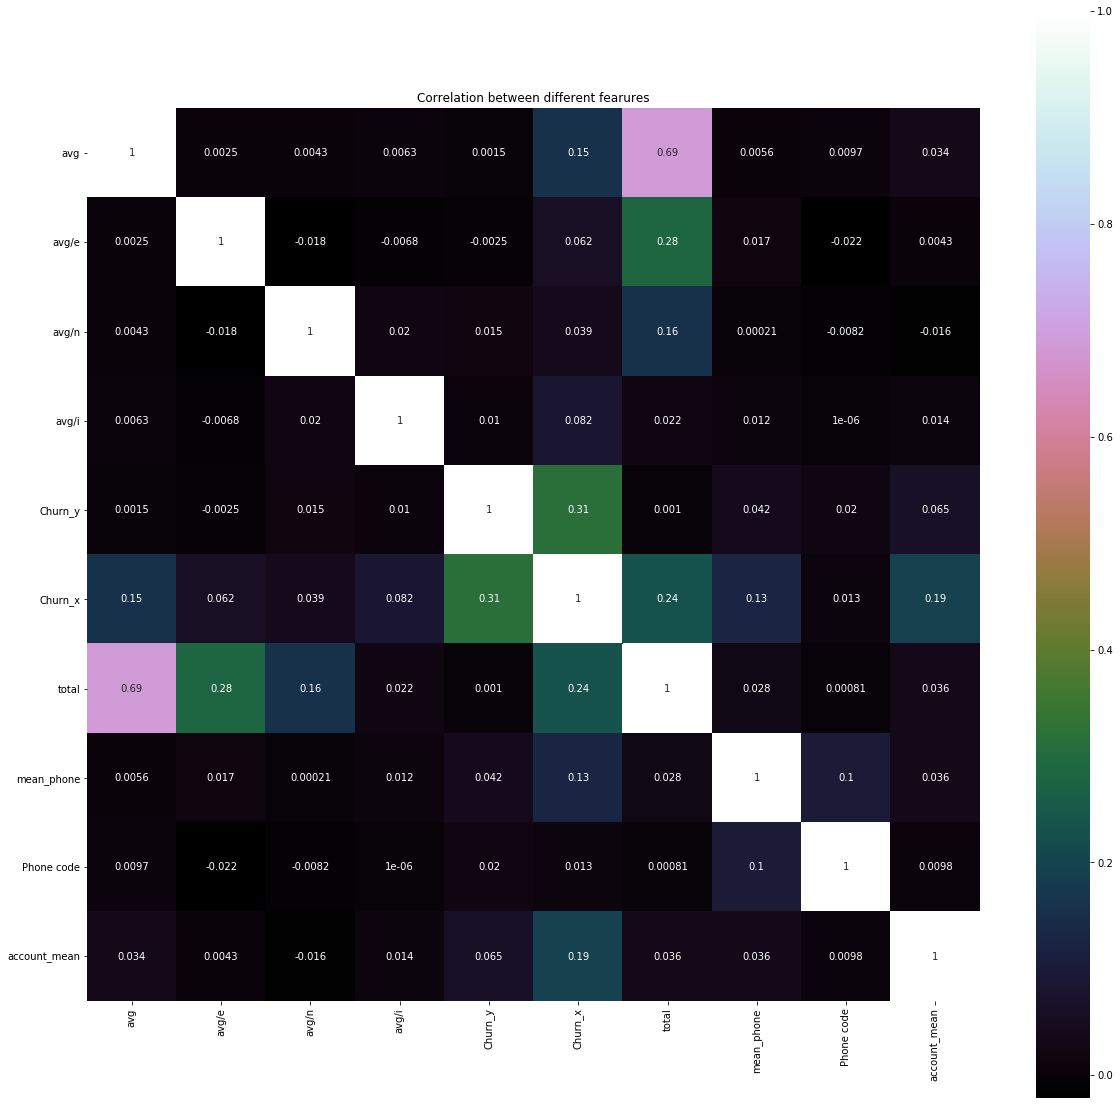

In [95]:
plt.Figure(figsize = (40,40))
correlation = co
#plt.figure(figsize=(10,10))
plt.figure(figsize = (20,20))
g = sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix',xticklabels=True,yticklabels=True)
g.set_yticklabels(g.get_yticklabels(), rotation =0)
g.set_xticklabels(g.get_yticklabels(), rotation =90)
plt.title('Correlation between different fearures')

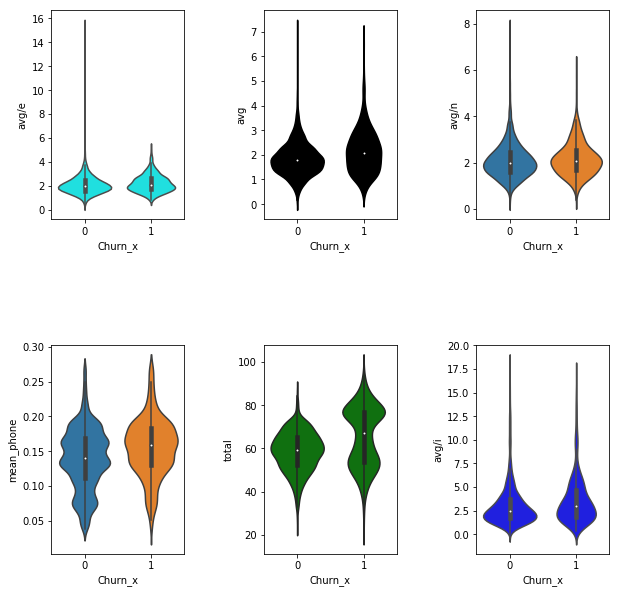

In [96]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace=0.6, wspace=0.6)
plt.subplot(2,3,1)
sns.violinplot(x="Churn_x", y='avg/e', data=train,color='cyan')
#sns.swarmplot(x="Churn_x", y='total_time_per_day', data=train, color="w")

plt.subplot(2,3,2)
sns.violinplot(x="Churn_x", y='avg', data=train,color='black')
#sns.swarmplot(x="Churn_x", y='avg', data=train, color="w", alpha=.5);

plt.subplot(2,3,3)
sns.violinplot(x="Churn_x", y= 'avg/n', data=train)
#sns.swarmplot(x="Churn_x", y= 'total_time_per_eve', data=train, color="w", alpha=.5);

plt.subplot(2,3,4)
sns.violinplot(x="Churn_x", y= 'mean_phone', data=train)
#sns.swarmplot(x="Churn_x", y= 'total_time_per_night', data=train, color="w", alpha=.5);


plt.subplot(2,3,5)
sns.violinplot(x="Churn_x", y= 'total', data=train,color='green')
#sns.swarmplot(x="Churn_x", y='total_time_per_interna', data=train, color="w", alpha=.5);



plt.subplot(2,3,6)
sns.violinplot(x="Churn_x", y= 'avg/i', data=train,color='blue')
#sns.swarmplot(x="Churn_x", y= 'mean_phone', data=train, color="w", alpha=.5);

In [559]:
#train['total_call'] = train['total day calls'] + train['total eve calls'] + train['total intl calls'] + train['total night calls']


In [27]:
#total time per` international  has negative effect on churn 

In [384]:
name = [ 'avg',  
       'total','mean_phone','Churn_y','account_mean']

In [23]:
train.fillna(0,inplace = True)

In [24]:
from sklearn.model_selection import train_test_split

In [100]:
X_train,X_test,y_train,y_test = train_test_split(train[name],train['Churn_x'],train_size = 0.8,test_size = 0.2)

In [101]:
import sklearn

In [102]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
Classifier = RandomForestClassifier(n_estimators=100)
from sklearn.metrics import roc_auc_score

In [104]:
Classifier.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [105]:
y_pred = Classifier.predict(X_test)
roc_auc_score(y_test,y_pred)

0.7948649949816811

In [106]:
import sklearn.tree

C:\Users\amogh\Anaconda2\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # Remove the CWD from sys.path while we load stuff.


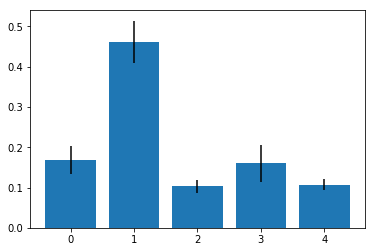

In [130]:

importance = Classifier.feature_importances_
importance = pd.DataFrame(importance, index=name, 
                          columns=["Importance"])

importance["Std"] = np.std([tree.feature_importances_
                            for tree in Classifier.estimators_], axis=0)

x = range(importance.shape[0])
y = importance.ix[:, 0]
yerr = importance.ix[:, 1]

plt.bar(x, y, yerr=yerr, align="center")

plt.show()

In [114]:
importance1 = importance.sort_values(by = 'Importance',ascending=False)

In [116]:
importance1= importance1.reset_index()

In [117]:
importance1.columns

Index(['index', 'Importance', 'Std'], dtype='object')

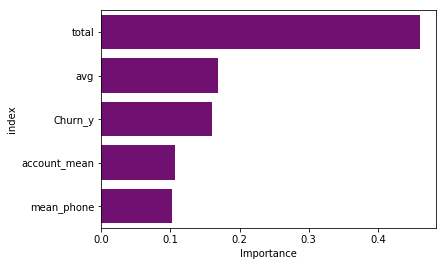

In [129]:

sns.barplot(x = importance1['Importance'],y = importance1['index'],color='purple')

In [385]:
data = train[name]

In [386]:
from sklearn.preprocessing import StandardScaler
n = StandardScaler()
data = n.fit_transform(data)

In [387]:
X_train,X_test,y_train,y_test = train_test_split(data,train['Churn_x'],train_size = 0.8,test_size = 0.2)

In [388]:
from sklearn.linear_model import LogisticRegression

In [389]:
Logistic = LogisticRegression(class_weight='balanced')

In [390]:
Logistic.fit(X_train,y_train)
y_pred = Logistic.predict(X_test)
roc_auc_score(y_test,y_pred)

0.7791514836022904

In [391]:
importance = Logistic.coef_

In [392]:
importance

array([[0.00959167, 0.84736399, 0.33229396, 0.84340971, 0.57967401]])

Text(0.5,1,'Churn')

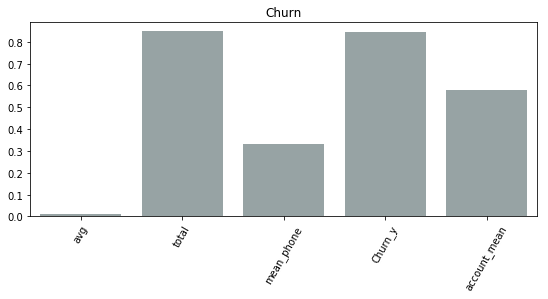

In [393]:
plt.figure(figsize=(20,15))
plt.subplots_adjust(hspace=0.6)
plt.subplot2grid((3,2),(0,1))
sns.barplot(name,importance[0],color="#95a5a6")
plt.xticks(rotation =60)
plt.title('Churn')

Modeling 

In [22]:
from sklearn.model_selection import GridSearchCV

In [26]:
dummy = pd.get_dummies(train['area code'])

In [27]:
dummy = dummy.iloc[:,1:]

In [31]:
train['city'] = dummy.iloc[:,0]

In [32]:
train['city_1'] = dummy.iloc[:,1]

In [30]:
dum = pd.get_dummies(test['area code'])
dum = dum.iloc[:,1:]


In [64]:
test['city'] = dum.iloc[:,0]
test['city_1'] = dum.iloc[:,1]

In [33]:
namess = ['city','city_1',
       'international plan', 
       'total day minutes', 'total day calls',
       'total eve minutes', 
       'total night minutes',  
       'total intl minutes', 
    'avg','total','mean_phone','Churn_y','account_mean']

In [34]:
train['area code'] = train['area code'].replace(415,0)
train['area code'] = train['area code'].replace(408,1)
train['area code'] = train['area code'].replace(510,2)

In [35]:
test =  train[train['ch'] == 0]
train =  train[train['ch'] == 1]

In [36]:
from sklearn.model_selection import GridSearchCV

In [41]:
data = train[namess]
data_test  = test[namess]
from sklearn.preprocessing import StandardScaler
n = StandardScaler()
data = n.fit_transform(data)
data_test = n.fit_transform(test)

# Create regularization penalt)y space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space
C = [0.5,0.8,1,1.2,1.5,2,3,4,5,6,7,8,9,10,11,12,13,14,15,15.5,16,16.1,16.2,16.4,16.5,16.6,16.8,16.9,17,17.5,18,18.5,19,19.5,20,20.5,21,21.5,22,22.5,23,23.5,24]
#C = [19,19.5,20,20.5,21,21.5,22,22.5,23,23.5,24]

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)




In [396]:

from sklearn.linear_model import LogisticRegression

Logistic = LogisticRegression(class_weight='balanced')

# Create grid search using 5-fold cross validation
clf = GridSearchCV(Logistic, hyperparameters, cv=5, verbose=0)

# Fit grid search
best_model = clf.fit(data,train['Churn_x'])
#Logistvic.fit(X_train,y_train)


In [397]:
# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 0.8


In [398]:
data_test = n.fit_transform(test[namess])
y_pred = best_model.predict(data_test)
roc_auc_score(test['Churn_x'],y_pred)

0.8390614171864172

In [399]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [400]:
print(classification_report(test['Churn_x'],y_pred))

             precision    recall  f1-score   support

          0       0.97      0.83      0.90      1443
          1       0.44      0.84      0.58       224

avg / total       0.90      0.84      0.86      1667



In [357]:
accuracy_score(test['Churn_x'],y_pred)

0.8392321535692862

In [358]:
confusion_matrix(test['Churn_x'],y_pred)

array([[1209,  234],
       [  34,  190]], dtype=int64)

In [346]:
print(accuracy_score(test['Churn_x'],y_pred))
print(confusion_matrix(test['Churn_x'],y_pred))


0.8392321535692862
[[1209  234]
 [  34  190]]


In [42]:
from sklearn.linear_model import LogisticRegression
Logistic = LogisticRegression(class_weight='balanced',C = 0.8)

In [43]:

Logistic.fit(data,train['Churn_x'])

LogisticRegression(C=0.8, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [54]:
sample_data = test.iloc[0:5,:]
sample_data1 = test.iloc[0:5,:]

In [51]:
sample_data = sample_data[namess]
sample_data = n.fit_transform(sample_data)

In [52]:
y_pred_sample = Logistic.predict(sample_data)

In [53]:
y_pred_sample

array([0, 1, 1, 0, 0], dtype=int64)

Text(0.5,1,'Churn')

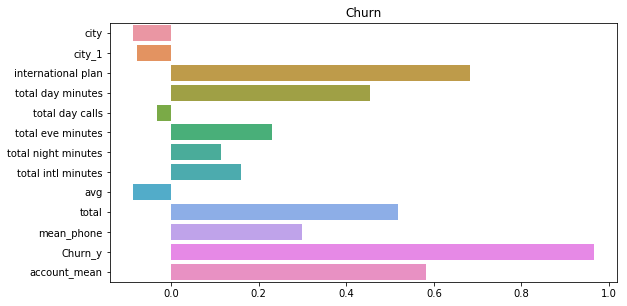

In [362]:
importance = Logistic.coef_

plt.figure(figsize=(20,20))
plt.subplots_adjust(hspace=0.6)
plt.subplot2grid((3,2),(0,1))
sns.barplot(importance[0],namess)
#plt.xticks(rotation =90)
plt.title('Churn')

In [363]:
# svm linear SVC

In [57]:
namess = [ 'international plan', 
       'total day minutes', 'total day calls', 
       'total eve minutes', 
       'total night minutes', 
       'total intl minutes', 'account_mean',
       'Churn_y',  'avg','total']

In [58]:
from sklearn.svm import LinearSVC

In [59]:
svm = LinearSVC(class_weight='balanced')

In [60]:
data = train[namess]
data_test  = test[namess]
from sklearn.preprocessing import StandardScaler
n = StandardScaler()
data = n.fit_transform(data)
data_test = n.fit_transform(test)


# Create regularization hyperparameter space
C = [0.05,1,1.5,2,2.5,3,3.5,4,4.1,4.2,4.3,4.4,4.5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10,10.5,11,11.5,12,12.5,13]
#gamma_2d_range = [0.05,1,1.5,2,2.5,3,3.5,4,4.5,5.5,6,6.5,7,7.5,8,8.5,9,10,11,12,13,14]
# Create hyperparameter options
hyperparameters = dict(C =C)

In [406]:


# Create grid search using 5-fold cross validation
clf = GridSearchCV(svm, hyperparameters, cv=5, verbose=0)

# Fit grid search
best_model = clf.fit(data,train['Churn_x'])
#Logistic.fit(X_train,y_train)

In [407]:
best_model.best_params_

{'C': 12}

In [408]:
data_test = n.fit_transform(test[namess])
y_pred = best_model.predict(data_test)
roc_auc_score(test['Churn_x'],y_pred)

0.816860644985645

In [61]:
svm = LinearSVC(class_weight='balanced',C = 12)

In [62]:
svm.fit(data,train['Churn_x'])

LinearSVC(C=12, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [63]:
data_test = n.fit_transform(test[namess])
y_pred = svm.predict(data_test)
roc_auc_score(test['Churn_x'],y_pred)

0.8248626373626373

In [412]:
svm.class_weight

'balanced'

In [413]:
svm = LinearSVC(class_weight='balanced',C = 12)
svm.fit(data,train['Churn_x'])
data_test = n.fit_transform(test[namess])
y_pred = svm.predict(data_test)
#roc_auc_score(test['Churn_x'],y_pred)

In [414]:
importance = svm.coef_

In [415]:
importance1 = []
for i in importance:
    for x in i:
        importance1.append(x)

In [416]:
importance = pd.DataFrame({'features':namess,'importance':importance1})

In [417]:
importance

,features,importance
0,international plan,0.207786
1,total day minutes,0.538665
2,total day calls,-0.030042
3,total eve minutes,0.218166
4,total night minutes,0.103178
5,total intl minutes,0.049873
6,account_mean,0.234227
7,Churn_y,0.362060
8,avg,-0.029042
9,total,-0.128765


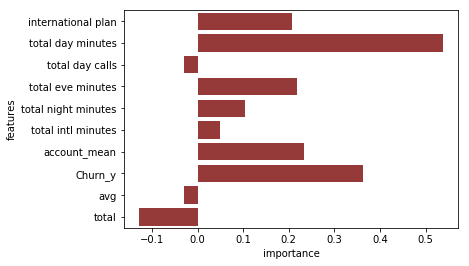

In [418]:
sns.barplot('importance','features',data = importance,color = 'brown')

In [419]:

print(classification_report(test['Churn_x'],y_pred))
print(accuracy_score(test['Churn_x'],y_pred))
print(confusion_matrix(test['Churn_x'],y_pred))

             precision    recall  f1-score   support

          0       0.97      0.82      0.89      1443
          1       0.42      0.83      0.56       224

avg / total       0.90      0.82      0.84      1667

0.8230353929214157
[[1186  257]
 [  38  186]]


In [335]:
train.to_csv(path+'/train_use.csv')

In [410]:
test.to_csv(path+'/test_use.csv')

In [ ]:
# Tree based model 

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [245]:
Classifier = RandomForestClassifier(class_weight='balanced',n_jobs=-1)

In [246]:
x = [ 'international plan', 'number vmail messages','city',
       'total day minutes', 'total day calls', 
       'total eve minutes', 'total eve calls',
       'total night minutes', 'total night calls', 
       'total intl minutes', 'total intl calls', 'account_mean',
       'Churn_y',  'avg','total','avg/i']

In [76]:
x = ['total','Churn_y','total day minutes','international plan','account_mean','avg/i','avg','total intl minutes','total eve minutes'
    ,'number vmail messages','total eve calls','total intl calls','avg/n','avg/e']

In [249]:
# parameters for GridSearchCV
param_grid2 = {"n_estimators": [10,30,40,50, 100,150,200,250,300,400,500],
              #"max_depth": [None,3,5,6,8,9,10,12,15,17,18,20],
              #"min_samples_split": [2,3,4,5,6,7,8,10,15,20],
             #"min_samples_leaf": [1,5,10,30,50,100,200,500],
             # "max_leaf_nodes": [None,5,10,20,30, 40],
              #"max_features": ['auto',0.5,'log2']
              }
grid_search = GridSearchCV(Classifier, param_grid=param_grid2)
best_model= grid_search.fit(train[x], train['Churn_x'])

#report(best_model.grid_scores_)

In [250]:
# best n_estimators
best_model.best_params_

{'n_estimators': 400}

In [536]:
# max depth
best_model.best_params_

{'max_depth': 8}

In [539]:
# best min sample split
best_model.best_params_

{'min_samples_split': 15}

In [541]:
# best min sample leaf
best_model.best_params_

{'min_samples_leaf': 1}

In [545]:
# max leaf node
best_model.best_params_

{'max_leaf_nodes': None}

In [543]:
# max features

best_model.best_params_

{'max_features': 0.5}

In [79]:
Classifier = RandomForestClassifier(class_weight='balanced',n_jobs=-1,n_estimators=400,max_depth=8,min_samples_split=15
                                   ,min_samples_leaf=1,max_features=0.5)

In [80]:
Classifier.fit(train[x],train['Churn_x'])

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=8, max_features=0.5,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=15, min_weight_fraction_leaf=0.0,
            n_estimators=400, n_jobs=-1, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [81]:
y_pred = Classifier.predict(test[x])
roc_auc_score(test['Churn_x'],y_pred)

0.9259927853677854

C:\Users\amogh\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


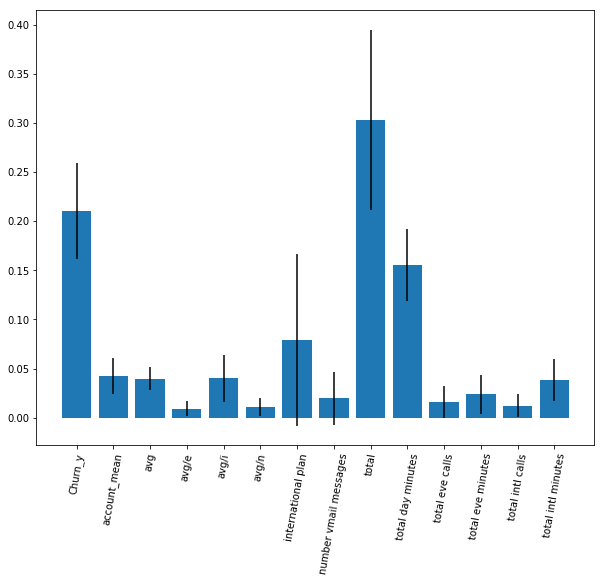

In [260]:
importance = Classifier.feature_importances_
importance = pd.DataFrame(importance, index=x, 
                          columns=["Importance"])

importance["Std"] = np.std([tree.feature_importances_
                            for tree in Classifier.estimators_], axis=0)
importance = importance.reset_index()

importance = importance.sort_values(by = 'Importance',ascending=False)
x = importance['index']
y = importance.ix[:, 1]
yerr = importance.ix[:, 2]

plt.figure(figsize=(10,8))
plt.bar(x,y, yerr=yerr, align="center",)
plt.xticks(rotation = 80)
plt.show()

In [256]:
importance

,index,Importance,Std
0,total,0.302995,0.091551
1,Churn_y,0.210543,0.049038
3,total day minutes,0.155458,0.037105
2,international plan,0.079437,0.087517
7,account_mean,0.042462,0.018285
5,avg/i,0.040006,0.023798
9,avg,0.039681,0.012021
4,total intl minutes,0.038183,0.021263
11,avg/e,0.023676,0.020161
6,number vmail messages,0.019794,0.027137


In [257]:
print(classification_report(test['Churn_x'],y_pred))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99      1443
          1       0.99      0.86      0.92       224

avg / total       0.98      0.98      0.98      1667



In [258]:
print(accuracy_score(test['Churn_x'],y_pred))
print(confusion_matrix(test['Churn_x'],y_pred))

0.9802039592081584
[[1442    1]
 [  32  192]]


In [263]:
x = ['total', 'international plan', 'Churn_y', 'number vmail messages',
       'account_mean', 'total intl minutes', 'total eve calls', 'avg/i',
       'total night calls', 'avg', 'total intl calls',
       'total night minutes', 'total day minutes', 'total eve minutes',
       'total day calls', 'city_1', 'city']

In [85]:
x = [ 'total', 'international plan', 'Churn_y', 'number vmail messages','account_mean','total intl minutes','total eve calls'
    ,'avg/i','total night calls', 'avg','total intl calls','total night minutes','total day minutes','total eve minutes',
    'total day calls']

In [86]:
import xgboost

In [87]:
from xgboost import XGBClassifier

In [88]:
#XGBClassifier?

In [756]:
Classifier1 = XGBClassifier(n_jobs=-1,n_estimators=100)

In [759]:
# parameters for GridSearchCV
param_grid2 = {"n_estimators": [50, 100,150,200,250,300],
                #'max_depth':range(3,10,2),
                #'min_child_weight':[3,4,5,6,7,8,9,10],
                #'gamma':[i/10.0 for i in range(0,5)],
                #'subsample':[i/10.0 for i in range(6,10)],
                 #'colsample_bytree':[i/10.0 for i in range(6,10)],
                #'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05],}
grid_search = GridSearchCV(Classifier1, param_grid=param_grid2,cv=3)
best = grid_search.fit(train[x], train['Churn_x'])

C:\Users\amogh\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\amogh\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\amogh\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\amogh\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but i

In [760]:
# n_estimators
print(best.best_params_)
print(best.best_score_)

{'n_estimators': 100}
0.9783978397839784


In [600]:
# max depth

best.best_params_

{'max_depth': 3}

In [744]:
# max depth and min child weight
print(best.best_params_)
print(best.best_score_)

{'max_depth': 3, 'min_child_weight': 3}
0.978997899789979


In [746]:
# gamma
print(best.best_params_)
print(best.best_score_)

{'gamma': 0.0}
0.9783978397839784


In [748]:
# subsample
print(best.best_params_)
print(best.best_score_)

{'subsample': 0.9}
0.9774977497749775


In [89]:
Classifier1 = XGBClassifier(n_jobs=-1,max_depth=3,min_child_weight=3,n_estimators=100,gamma=0,subsample=0.9,learning_rate=0.05)


In [90]:
Classifier1.fit(train[x],train['Churn_x'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=3, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.9)

In [91]:
y_pred = Classifier1.predict(test[x])
roc_auc_score(test['Churn_x'],y_pred)

C:\Users\amogh\Anaconda2\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9308035714285714

In [286]:
importance = Classifier1.feature_importances_


In [287]:
imp = pd.DataFrame({'names':x,'importance':importance})

In [288]:
imp = imp.sort_values(by='importance',ascending=False)

In [289]:
c = imp['names'].values

Text(0.5,1,'feature importance')

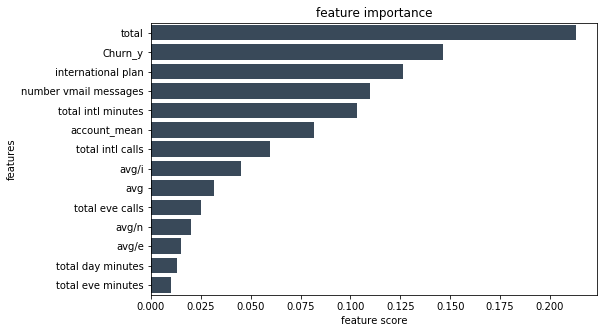

In [291]:

plt.figure(figsize=(8,5))
pat = sns.barplot(imp['importance'],imp['names'],color="#34495e")
plt.xlabel('feature score')
plt.ylabel('features')
plt.title('feature importance')



In [292]:
print(classification_report(test['Churn_x'],y_pred))
print(accuracy_score(test['Churn_x'],y_pred))
print(confusion_matrix(test['Churn_x'],y_pred))

             precision    recall  f1-score   support

          0       0.98      1.00      0.99      1443
          1       1.00      0.86      0.93       224

avg / total       0.98      0.98      0.98      1667

0.9814037192561488
[[1443    0]
 [  31  193]]


In [293]:
wrong_predict = pd.DataFrame({'orginal':test['Churn_x'],'predicted':y_pred})

In [294]:
wrong = wrong_predict[(wrong_predict['orginal'] == 1) & (wrong_predict['predicted'] == 0)]

In [295]:
index = wrong.index

In [296]:
test1 = test

In [297]:
test1 = test1.reset_index()

In [298]:
wrong = test1.loc[test1['index'].isin(index)]